<a href="https://colab.research.google.com/github/adlisamir/ML_and_AI/blob/main/1D_heat_deepxde_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install deepxde
import deepxde as dde
from deepxde.backend import tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
k = 0.4
L = 1
n = 1

In [5]:
geom = dde.geometry.Interval(0,L)
timedomain = dde.geometry.TimeDomain(0,n)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [6]:
ic = dde.icbc.IC(geomtime, lambda x: np.sin(n* np.pi * x[:,0:1]/L), lambda _, on_initial: on_initial)

In [7]:
input_array = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]])

lambda_function = lambda x : 2*x[:,0:1]

result_array = lambda_function(input_array)

print(result_array)

[[ 2]
 [ 8]
 [14]]


In [8]:
cond_lambda = lambda x : "Even" if x%2 == 0 else "Odd"
print(cond_lambda(4))
print(cond_lambda(3))

Even
Odd


In [9]:
def double_first_column(input_array):
    return 2 * input_array[:, 0:1]

bc = dde.icbc.DirichletBC(
    geomtime,
    lambda input_array: double_first_column(input_array),
    lambda _,
    on_boundary: on_boundary)

In [10]:
def pde(comp,u):
    du_t = dde.grad.jacobian(u,comp, i=0,j=1)
    du_xx = dde.grad.hessian(u,comp, i=0,j=0)
    return du_t - k * du_xx

In [11]:
data = dde.data.TimePDE(geomtime,
                       pde,
                       [bc,ic],
                       num_domain = 2540,
                       num_boundary = 80,
                       num_initial = 160,
                       num_test = 2540,
                       )

In [12]:
net = dde.nn.FNN([2] + [20]*3+ [1], "tanh", "Glorot normal")

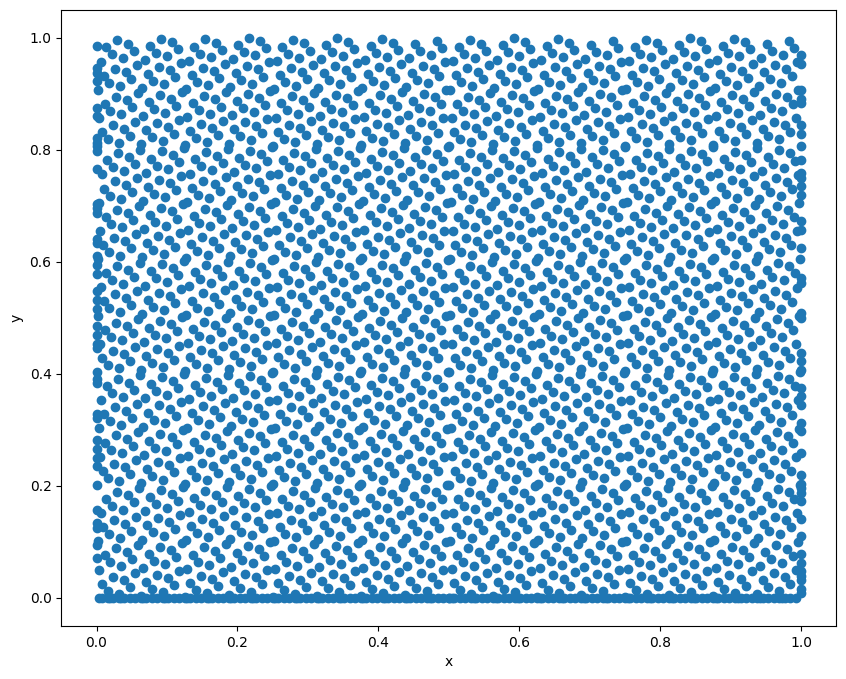

In [13]:
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_all[:,0],data.train_x_all[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
model = dde.Model(data, net)

In [15]:
model.compile("adam", lr=1e-3)

Compiling model...
'compile' took 0.071874 s



In [16]:
losshistory, train_state = model.train(iterations = 15000)

Training model...



Cause: could not parse the source code of <function <lambda> at 0x7b140a62fa60>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7b140a62fa60>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7b140a62e3e0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function <lambda> at 0x7b140a62e3e0>: no matching AST found among candidates:
# coding=utf-8
lambda x, on: np.array([on_boundary(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary1(x[i], on[i]) for i in range(len(x))])
# coding=utf-8
lambda x, on: np.array([on_boundary2(x[i], on[i]) for i in range(len(x))])
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Step      Train loss                        Test loss                         Test metric
0         [1.02e+00, 4.02e+00, 7.45e-01]    [9.86e-01, 4.02e+00, 7.45e-01]    []  
1000      [2.17e-02, 7.84e-02, 2.56e-01]    [1.88e-02, 7.84e-02, 2.56e-01]    []  
2000      [1.27e-02, 6.10e-02, 1.07e-01]    [8.56e-03, 6.10e-02, 1.07e-01]    []  
3000      [1.15e-02, 4.21e-02, 3.83e-02]    [6.77e-03, 4.21e-02, 3.83e-02]    []  
4000      [9.42e-03, 3.47e-02, 2.83e-02]    [5.18e-03, 3.47e-02, 2.83e-02]    []  
5000      [

In [17]:
#Limited-memory Broyden-Fletcher-Goldfarb-Shanno
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 0.007593 s

Training model...

Step      Train loss                        Test loss                         Test metric
15000     [1.56e-02, 1.04e-02, 1.00e-02]    [6.63e-03, 1.04e-02, 1.00e-02]    []  
16614     [3.35e-04, 2.58e-04, 1.34e-04]    [2.55e-04, 2.58e-04, 1.34e-04]    []  

Best model at step 16614:
  train loss: 7.27e-04
  test loss: 6.47e-04
  test metric: []

'train' took 479.726666 s



Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


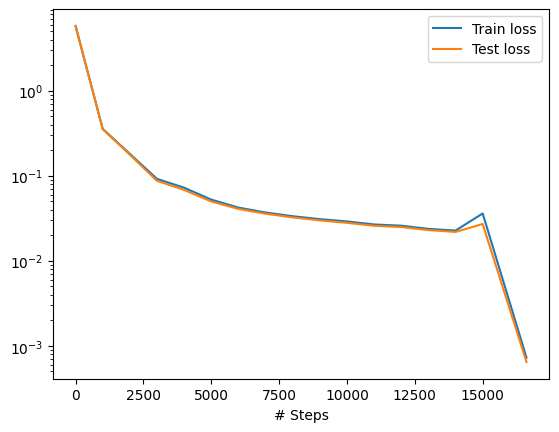

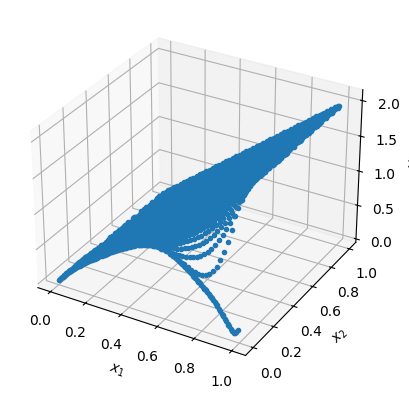

In [18]:
dde.saveplot(losshistory,train_state, issave= True, isplot=True)